Khởi tạo các thư viện

In [44]:
import yfinance as yf 
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('dark_background') #Style biểu đồ
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Khởi tạo time và đọc dữ liệu

In [45]:
end = datetime.now() #Kết thúc lúc hiện tại
start = datetime(end.year-10, end.month, end.day) #Bắt đầu lúc 10 năm trước

Công ty mẫu: Google

In [46]:
company = "GOOG" #ID trên yahoo finance
company_data = yf.download(company, start, end)
company_data.round(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,26.96,27.35,26.29,26.83,26.83,88033033
2014-04-08,27.06,27.67,27.01,27.67,27.67,63024560
2014-04-09,27.90,28.19,27.57,28.13,28.13,66616395
2014-04-10,28.17,28.17,26.92,26.97,26.97,80737057
2014-04-11,26.55,26.93,26.25,26.46,26.46,78496923
...,...,...,...,...,...,...
2024-04-01,151.83,157.00,151.65,156.50,156.50,24469800
2024-04-02,154.75,155.99,153.46,155.87,155.87,17598100
2024-04-03,154.92,156.55,154.13,156.37,156.37,17218400


Mô tả dữ liệu

In [47]:
company_data.shape #Kích thước gồm 2517 dòng và 6 cột tương ứng với 6 giá trị, các giá trị ở phần dưới 

(2517, 6)

In [48]:
company_data.head()
#Open: Giá mà tài sản tài chính được giao dịch lần đầu trong ngày giao dịch. Đây là giá cả đầu tiên mà người mua và người bán đồng ý trong ngày đó.
#High: Giá cao nhất là giá cao nhất mà tài sản tài chính đạt được trong suốt khoảng thời gian giao dịch được xem xét, thường là trong một ngày giao dịch.
#Low: Giá thấp nhất là giá thấp nhất mà tài sản tài chính đạt được trong suốt khoảng thời gian giao dịch được xem xét, thường là trong một ngày giao dịch.
#Close:  Giá đóng cửa là giá cuối cùng mà tài sản tài chính được giao dịch trong một ngày giao dịch. Đây là giá cuối cùng mà người mua và người bán đồng ý trước khi thị trường đóng cửa.
#Adj Close: Giá đóng cửa điều chỉnh là giá đóng cửa được điều chỉnh để tính toán các yếu tố bổ sung như chia cổ tức, chia tách cổ phiếu hoặc cổ phiếu quyền chọn. Điều này giúp cho việc so sánh giá cổ phiếu qua các thời kỳ không bị ảnh hưởng bởi các biến động về cơ bản.
#Volume: Là số lượng tài sản được giao dịch trong một ngày giao dịch.   

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
2014-04-08,27.055719,27.674021,27.006353,27.669035,27.669035,63024560
2014-04-09,27.904388,28.191101,27.571802,28.129770,28.129770,66616395
2014-04-10,28.172651,28.172651,26.921087,26.973444,26.973444,80737057
2014-04-11,26.554594,26.926073,26.254417,26.457361,26.457361,78496923


In [49]:
company_data.info() #Định dạng kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-04-07 to 2024-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [50]:
company_data.describe() #Mô tả

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,72.022395,72.792693,71.310103,72.070401,72.070401,3.219333e+07
std,38.607699,39.068619,38.204867,38.639175,38.639175,1.568766e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,38.750000,38.999001,38.502499,38.710499,38.710499,2.251530e+07
50%,58.507000,58.930500,57.917999,58.444500,58.444500,2.828990e+07
75%,104.897499,106.178001,103.619003,105.019997,105.019997,3.678000e+07
max,155.080002,157.000000,154.132004,156.500000,156.500000,2.232980e+08


In [51]:
data = company_data.filter(['Adj Close'])
data

,Adj Close
Date,
2014-04-07,26.833828
2014-04-08,27.669035
2014-04-09,28.129770
2014-04-10,26.973444
2014-04-11,26.457361
...,...
2024-04-01,156.500000
2024-04-02,155.869995
2024-04-03,156.369995


Tiền xử lý dữ liệu

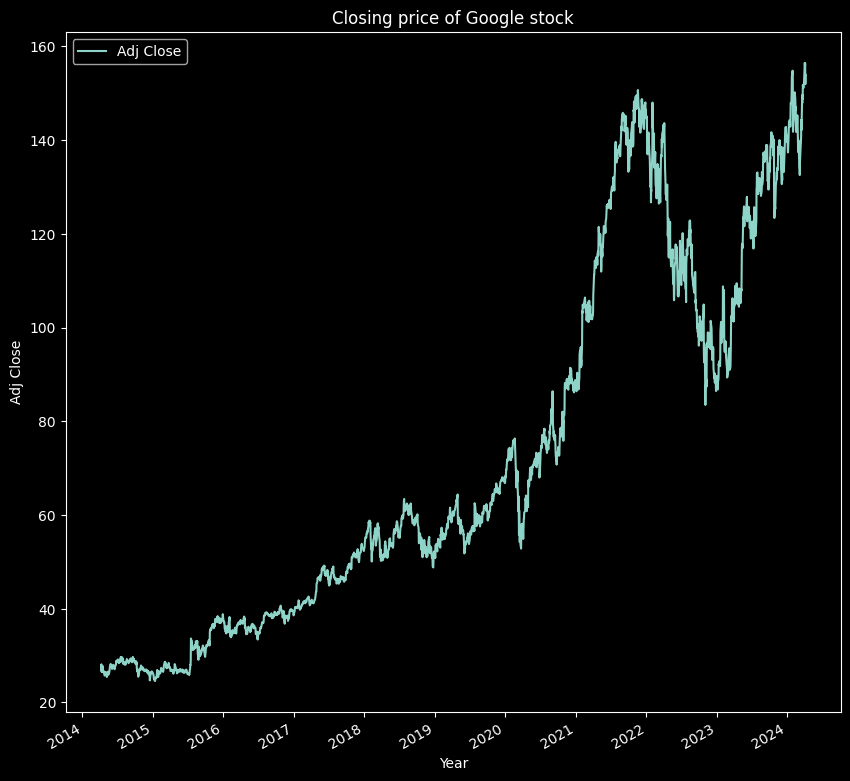

In [52]:
plt.figure(figsize=(10, 10))
company_data['Adj Close'].plot()
plt.xlabel("Year")
plt.ylabel("Adj Close")
plt.title("Closing price of Google stock")
plt.legend()
plt.show()

Chuẩn bị dữ liệu

In [53]:
#Chia tỉ lệ giá cổ phiếu.
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
scaler_data
len(scaler_data)

2517

Chuẩn bị dữ liệu ---> Training model

Tạo x_train và y_train.
x_train: chứa tập giá trị của 60 ngày liên tiếp
y_train: chứa giá trị của các ngày tiếp theo
* Lưu ý: 60 là khoảng thời gian để suy luận và dự đoán giá cổ phiếu. Lấy số liệu từ 3 tháng vì chia ra theo các quý sẽ ổn định hơn...(kinh nghiệm cá nhân >^<)

In [54]:
x_train = []
y_train = []
for i in range(60, len(scaler_data)):
    x_train.append(scaler_data[i-60:i])
    y_train.append(scaler_data[i])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2457, 60, 1)

Xây dựng model

In [42]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=100)


c:\VISUAL STUIDO CODE\Stock_predict\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0422
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0025
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0026
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0020
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0019
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0018
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0020
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0018
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0018
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0016
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0015
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0018
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0017
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0017
Epoch 15/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - lo

In [43]:
model.save('model.h5')